In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 


2023-04-05 10:27:00.373449: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
len(Y_train)

60000

In [6]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

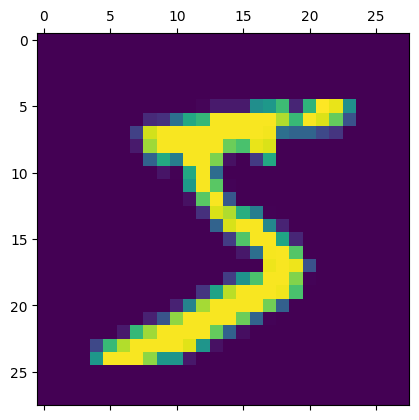

In [7]:
plt.matshow(X_train[0])

In [8]:
X_train=X_train/255
X_test=X_test/255

In [9]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
# to establish a single layer of nueral network for X_train that contains value of pixels ranging from 0 to 255
# Y_train contains the value correspnding to X_train pixel scores 

In [10]:
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [11]:
nueral_network=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    #to connect first layer with second the keras.layer.Dense(Output layer levels,input shape,activation function)function is used 
    
    
])
nueral_network.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy']
                      )
nueral_network.fit(X_train_flattened,Y_train,epochs=5)
#epochs is like a loop for nueral network where laerningis done and improved by each loop runned over whole training dataset 

Epoch 1/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.4716 - accuracy: 0.8748
Epoch 2/5
1875/1875 [==============================] - 2s 976us/step - loss: 0.3042 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 972us/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 981us/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 978us/step - loss: 0.2670 - accuracy: 0.9250


In [12]:
nueral_network.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 0s 903us/step - loss: 0.2647 - accuracy: 0.9270


[0.2646828591823578, 0.9269999861717224]

In [13]:
Y_predict=nueral_network.predict(X_test_flattened)

313/313 [==============================] - 0s 768us/step


In [14]:
Y_predict[0]

array([2.5370523e-02, 4.0722344e-07, 6.9207072e-02, 9.4517142e-01,
       1.9571248e-03, 1.0799199e-01, 1.1313934e-06, 9.9979085e-01,
       1.1516407e-01, 7.0441091e-01], dtype=float32)

In [15]:
np.argmax(Y_predict[0])

7

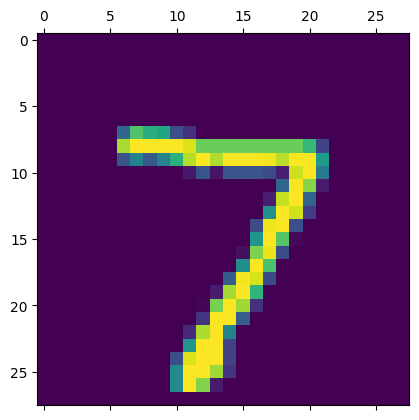

In [16]:
plt.matshow(X_test[0])

In [17]:
Y_predict_labels=[np.argmax(i) for i in Y_predict]
Y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    4,    9,    2,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   5,    9,  927,   16,    6,    3,   12,   10,   40,    4],
       [   2,    0,   20,  916,    0,   29,    2,   12,   22,    7],
       [   1,    1,    7,    2,  904,    0,   11,    5,   11,   40],
       [   8,    3,    3,   27,    6,  785,   17,    6,   31,    6],
       [   8,    3,    6,    1,    7,   12,  916,    2,    3,    0],
       [   1,    5,   21,    4,    2,    1,    0,  958,    5,   31],
       [   6,    8,    6,   17,    9,   27,   10,   12,  873,    6],
       [  10,    7,    1,    8,   20,    7,    0,   25,   11,  920]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

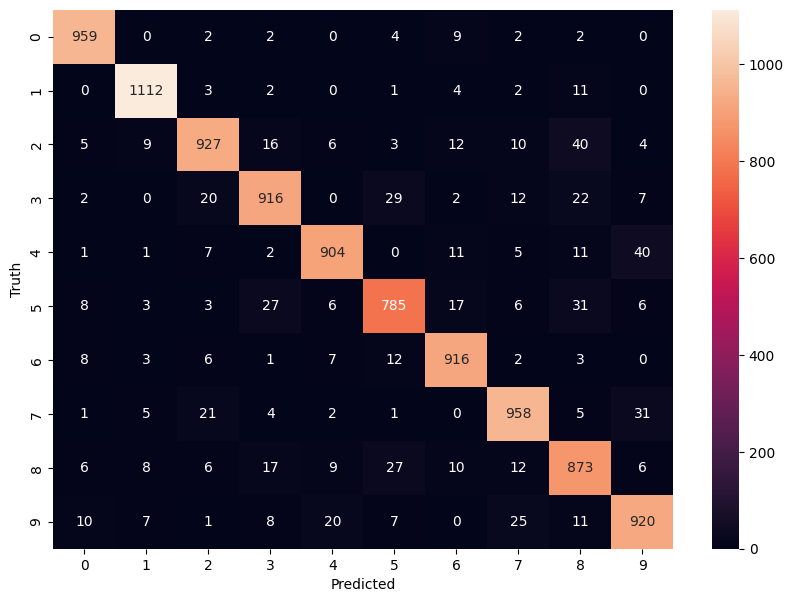

In [19]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
nueral_network=keras.Sequential([
    keras.layers.Dense(1000,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
    # to connect first layer with second the keras.layer.Dense(Next layer levels,input shape,activation function)function is used 
    # here in the second layer input shape is not defined as it can asses it from first layer
    
])
nueral_network.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',  
                      metrics=['accuracy']
                      )
nueral_network.fit(X_train_flattened,Y_train,epochs=5)
#epochs is like a loop for nueral network where laerningis done and improved by each loop runned over whole training dataset 

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3311 - accuracy: 0.9045
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1667 - accuracy: 0.9505
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1046 - accuracy: 0.9690
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0708 - accuracy: 0.9783
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0515 - accuracy: 0.9841


In [21]:
nueral_network.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9778


[0.07296378910541534, 0.9778000116348267]

Text(95.72222222222221, 0.5, 'Truth')

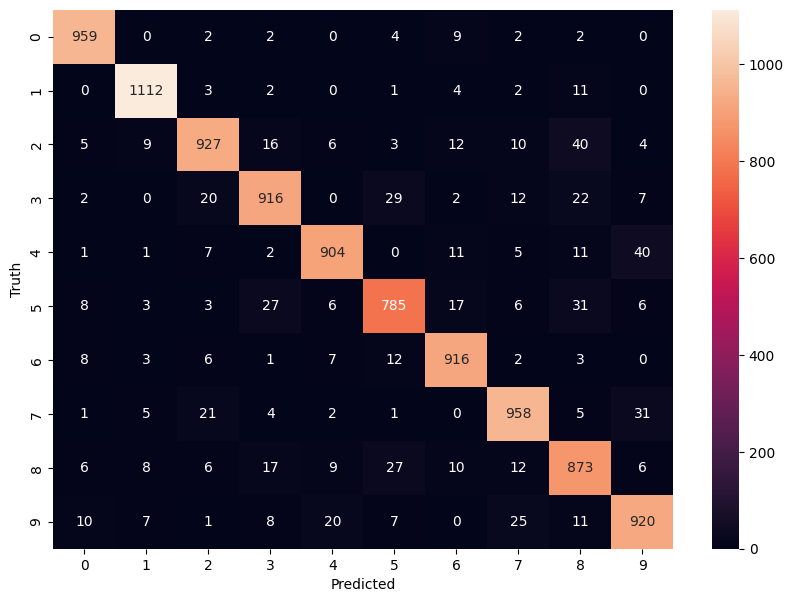

In [22]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
Y_predict=nueral_network.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [24]:
Y_predict_labels=[np.argmax(i) for i in Y_predict]


In [25]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    1,    2,    0,    2,    1,    1,    0],
       [   0, 1125,    1,    3,    0,    1,    2,    0,    3,    0],
       [   7,    1, 1004,    2,    2,    0,    2,    7,    7,    0],
       [   0,    0,    3,  993,    1,    1,    0,    5,    4,    3],
       [   1,    0,    2,    1,  963,    0,    5,    3,    0,    7],
       [   4,    0,    0,   15,    3,  852,   10,    2,    4,    2],
       [   2,    3,    0,    1,    3,    2,  945,    0,    2,    0],
       [   1,    4,    7,    3,    2,    0,    0, 1008,    0,    3],
       [   3,    1,    1,    5,    5,    2,    5,    3,  947,    2],
       [   5,    2,    0,    7,   17,    1,    0,    8,    0,  969]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

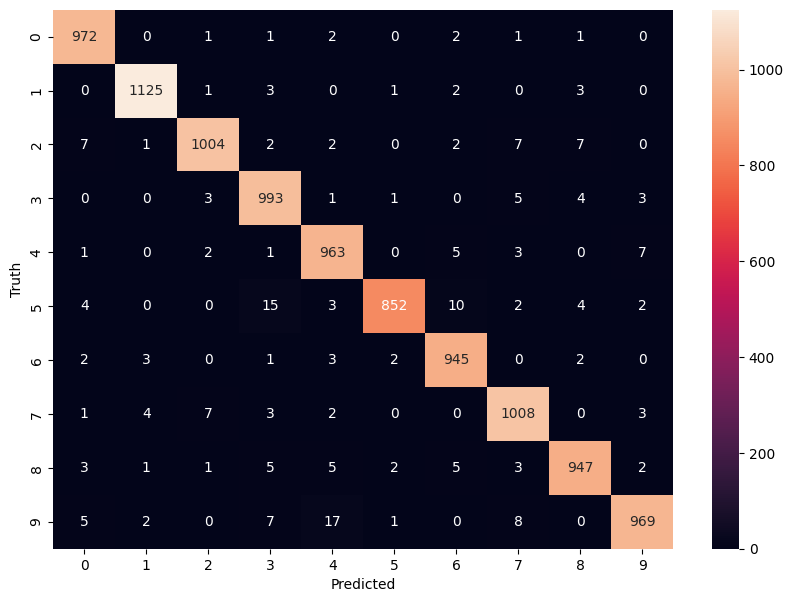

In [26]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
nueral_network=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10000,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
    # to connect first layer with second the keras.layer.Dense(Next layer levels,input shape,activation function)function is used 
    # here in the second layer input shape is not defined as it can asses it from first layer
    
])
nueral_network.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy']
                      )
nueral_network.fit(X_train,Y_train,epochs=5)
#epochs is like a loop for nueral network where laerningis done and improved by each loop runned over whole training dataset 

Epoch 1/5
1875/1875 [==============================] - 150s 80ms/step - loss: 0.4032 - accuracy: 0.8845
Epoch 2/5
1875/1875 [==============================] - 150s 80ms/step - loss: 0.1846 - accuracy: 0.9466
Epoch 3/5
1875/1875 [==============================] - 152s 81ms/step - loss: 0.1053 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 155s 82ms/step - loss: 0.0697 - accuracy: 0.9781
Epoch 5/5
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0478 - accuracy: 0.9851


In [28]:
Y_predict=nueral_network.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [29]:
Y_predict_labels=[np.argmax(i) for i in Y_predict]
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_predict_labels)


Text(95.72222222222221, 0.5, 'Truth')

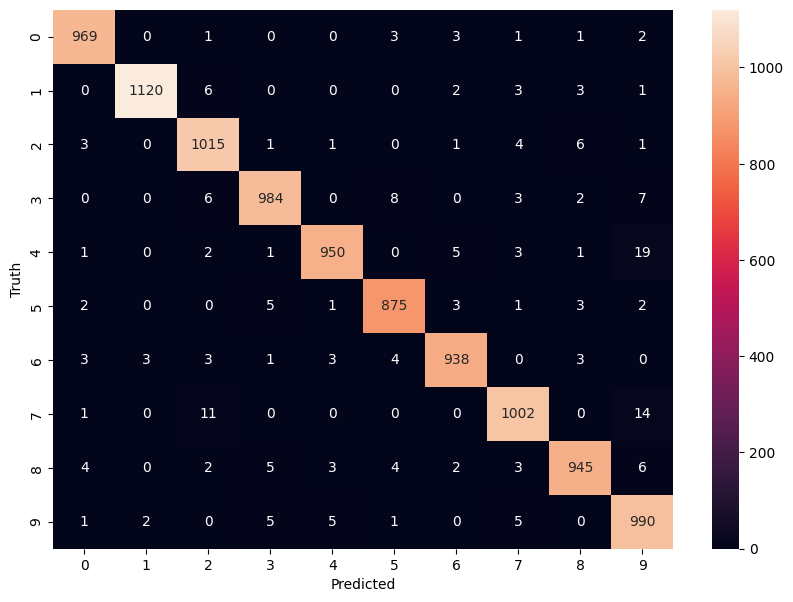

In [30]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
nueral_network=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
    # to connect first layer with second the keras.layer.Dense(Next layer levels,input shape,activation function)function is used 
    # here in the second layer input shape is not defined as it can asses it from first layer
    
])
nueral_network.compile(optimizer='adamax',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy']
                      )
nueral_network.fit(X_train,Y_train,epochs=5)
#epochs is like a loop for nueral network where laerningis done and improved by each loop runned over whole training dataset 

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4213 - accuracy: 0.8867
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2709 - accuracy: 0.9221
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2268 - accuracy: 0.9354
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1902 - accuracy: 0.9449
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1619 - accuracy: 0.9532
